# 3.8 Multilayer Perceptron

## 3.8.1 Hidden Layers

- Single linear transformation $$ \hat{\mathbf{o}} = \mathrm{softmax}(\mathbf{W} \mathbf{x} + \mathbf{b}) $$ ![](https://github.com/diveintodeeplearning/d2l-en/raw/master/img/singlelayer.svg?sanitize=true)
  - ***linearity*** is a strong assumption
    - It means that increasing the value of the input should either drive the value of the output up or drive it down, irrespective of the value of the other inputs
    - In case of classifying cats and dogs based on black and white images
      - Increasing each pixel value either increases the probability that it depicts a dog or decreases it --> not reasonable
    
- From one to many
  - We can model more generally by incorporating ***one or more hidden layers***. 
  - Multi-layer Perceptron (MLP)
    - E.g., a hidden layer with 5 hidden units 
    - both the hidden layer and the output layer in the multilayer perceptron are fully connected layers.
  ![](https://github.com/diveintodeeplearning/d2l-en/raw/master/img/mlp.svg?sanitize=true)

- From linear to nonlinear
  - Wrong mathematical model
$$ \begin{aligned} \mathbf{h} & = \mathbf{W}_1 \mathbf{x} + \mathbf{b}_1 \\ \mathbf{o} & = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 \\ \hat{\mathbf{y}} & = \mathrm{softmax}(\mathbf{o}) \end{aligned} $$<br/>
  - We can collapse out the hidden layer by an equivalently parametrized single layer perceptron <br/><br/>$$\mathbf{o} = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 = \mathbf{W}_2 (\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) + \mathbf{b}_2 = (\mathbf{W}_2 \mathbf{W}_1) \mathbf{x} + (\mathbf{W}_2 \mathbf{b}_1 + \mathbf{b}_2) = \mathbf{W} \mathbf{x} + \mathbf{b}$$<br/>
  - To fix this we need another key ingredient - a nonlinearity $\sigma$ such as $\mathrm{max}(x,0)$ after each layer <br/><br/> $$ \begin{aligned} \mathbf{h} & = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1) \\ \mathbf{o} & = \mathbf{W}_2 \mathbf{h} + \mathbf{b}_2 \\ \hat{\mathbf{y}} & = \mathrm{softmax}(\mathbf{o}) \end{aligned} $$<br/>
  - Clearly we could continue stacking such hidden layers, e.g. $\mathbf{h}_1 = \sigma(\mathbf{W}_1 \mathbf{x} + \mathbf{b}_1)$ and $\mathbf{h}_2 = \sigma(\mathbf{W}_2 \mathbf{h}_1 + \mathbf{b}_2)$ on top of each other to obtain a true multilayer perceptron.
  
  - Multilayer perceptrons are universal approximators.
    - Even for a single-hidden-layer neural network, with enough nodes, and the right set of weights, it could model any function at all! 
    - Actually learning that function is the hard part. 
    - It turns out that we can approximate functions much more compactly if we use deeper (vs wider) neural networks.
    
- Vectorization and mini-batch
  - denote by $\mathbf{X}$ the matrix of inputs from a minibatch. 
  - Then an MLP with two hidden layers can be expressed as $$ \begin{aligned} \mathbf{H}_1 & = \sigma(\mathbf{W}_1 \mathbf{X} + \mathbf{b}_1) \\ \mathbf{H}_2 & = \sigma(\mathbf{W}_2 \mathbf{H}_1 + \mathbf{b}_2) \\ \mathbf{O} & = \mathrm{softmax}(\mathbf{W}_3 \mathbf{H}_2 + \mathbf{b}_3) \end{aligned} $$
  - With some abuse of notation, we define the nonlinearity $\sigma$ to apply to its inputs on a ***row-wise fashion***
    - i.e. ***one observation at a time***, often one coordinate at a time. 
    - This is true for most activation functions
    - But, **batch normalization*** is a notable exception from that rule.



## 3.8.2 Activation Functions

- ReLU (rectified linear unit) function $$\mathrm{ReLU}(x) = \max(x, 0).$$



In [1]:
%matplotlib inline
import gluonbook as gb
from mxnet import autograd, nd

def xyplot(x_vals, y_vals, name):
    gb.set_figsize(figsize=(5, 2.5))
    gb.plt.plot(x_vals.asnumpy(), y_vals.asnumpy())
    gb.plt.xlabel('x')
    gb.plt.ylabel(name + '(x)')

- ReLU activation function is a two-stage linear function.
- ***ReLU reduces the issue of the vanishing gradient problem***. 

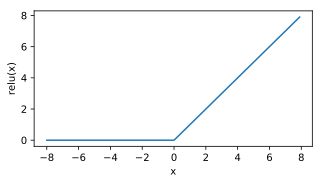

In [5]:
x = nd.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = x.relu()
xyplot(x, y, 'relu')

- The input is negative --> the derivative of ReLU function is 0
- The input is positive --> the derivative of ReLU function is 1.
- Note that the ReLU function is not differentiable when the input is 0.
  - Instead, we pick its left-hand-side (LHS) derivative 0 at location 0.

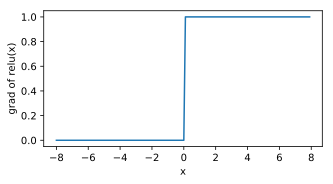

In [6]:
y.backward()
xyplot(x, x.grad, 'grad of relu')

- Parameterized ReLU
  - https://arxiv.org/abs/1502.01852: Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification (Feb 2015) $$\mathrm{pReLU}(x) = \max(0, x) - \alpha x$$



- Sigmoid Function
  - The Sigmoid function can transform the value of an element in $\mathbb{R}$ to the interval $(0,1)$. $$\mathrm{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$
  - In the “Recurrent Neural Network”, we will describe how to utilize the function's ability to control the flow of information in a neural network thanks to its capacity to transform the value range between 0 and 1. 
  - When the input is close to 0, the Sigmoid function approaches a linear transformation.

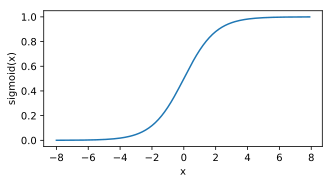

In [7]:
with autograd.record():
    y = x.sigmoid()
xyplot(x, y, 'sigmoid')

- The derivative of Sigmoid function $$\frac{d}{dx} \mathrm{sigmoid}(x) = \frac{-\exp(x)}{(1 + \exp(-x))^2} = \mathrm{sigmoid}(x)\left(1-\mathrm{sigmoid}(x)\right).$$
  - The input is 0, the derivative of the Sigmoid function reaches a maximum of 0.25
  - As the input deviates further from 0, the derivative of Sigmoid function approaches 0.

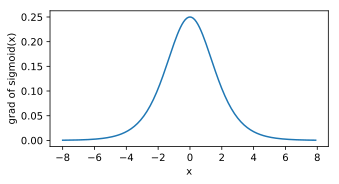

In [8]:
y.backward()
xyplot(x, x.grad, 'grad of sigmoid')

- Tanh Function
  - The Tanh (Hyperbolic Tangent) function transforms the value of an element to the interval between -1 and 1: $$\text{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$
    - Tanh function is symmetric at the origin of the coordinate system.

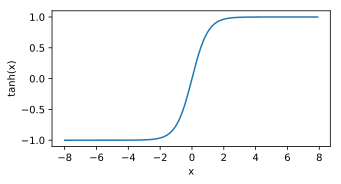

In [9]:
with autograd.record():
    y = x.tanh()
xyplot(x, y, 'tanh')

- The derivative of the Tanh function $$\frac{d}{dx} \mathrm{tanh}(x) = 1 - \mathrm{tanh}^2(x).$$
  - The input is 0, the derivative of the Tanh function reaches a maximum of 1.0
  - As the input deviates further from 0, the derivative of Than function approaches 0.

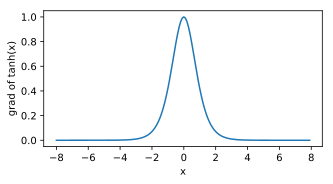

In [10]:
y.backward()
xyplot(x, x.grad, 'grad of tanh')

# 3.9 Implementing a Multilayer Perceptron from Scratch

In [11]:
%matplotlib inline
import gluonbook as gb
from mxnet import nd
from mxnet.gluon import loss as gloss

In [12]:
batch_size = 256
train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)

## 3.9.1 Initialize Model Parameters

- an MLP with one hidden layer
  - the number of hidden units: 256

In [13]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nd.random.normal(scale=0.01, shape=(num_inputs, num_hiddens))
b1 = nd.zeros(num_hiddens)
W2 = nd.random.normal(scale=0.01, shape=(num_hiddens, num_outputs))
b2 = nd.zeros(num_outputs)
params = [W1, b1, W2, b2]

for param in params:
    param.attach_grad()

## 3.9.2 Activation Function

In [14]:
def relu(X):
    return nd.maximum(X, 0)

## 3.9.3 The model

In [17]:
def net(X):
    X = X.reshape((-1, num_inputs)) # X: (-1, 784), W1: (784, 256)
    H = relu(nd.dot(X, W1) + b1)    # nd.dot(X, W1): (-1, 256), b1: (256,), W2: (256, 10)
    return nd.dot(H, W2) + b2       # nd.dot(H, W2): (-1, 10), b2: (10,)

## 3.9.4 The Loss Function
- For better numerical stability, we use Gluon’s functions, including softmax calculation and cross-entropy loss calculation.

In [18]:
loss = gloss.SoftmaxCrossEntropyLoss()

## 3.9.5 Training

In [19]:
num_epochs, lr = 10, 0.5

gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.8047, train acc 0.699, test acc 0.791
epoch 2, loss 0.4860, train acc 0.818, test acc 0.840
epoch 3, loss 0.4252, train acc 0.842, test acc 0.861
epoch 4, loss 0.3975, train acc 0.852, test acc 0.861
epoch 5, loss 0.3736, train acc 0.862, test acc 0.873
epoch 6, loss 0.3519, train acc 0.871, test acc 0.875
epoch 7, loss 0.3374, train acc 0.875, test acc 0.875
epoch 8, loss 0.3235, train acc 0.882, test acc 0.880
epoch 9, loss 0.3195, train acc 0.882, test acc 0.877
epoch 10, loss 0.3070, train acc 0.886, test acc 0.884


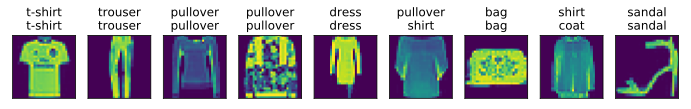

In [20]:
for X, y in test_iter:
    break

true_labels = gb.get_fashion_mnist_labels(y.asnumpy())
pred_labels = gb.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [truelabel + '\n' + predlabel for truelabel, predlabel in zip(true_labels, pred_labels)]

gb.show_fashion_mnist(X[0:9], titles[0:9])

# 3.10 Multilayer Perceptron in Gluon

In [21]:
import gluonbook as gb
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

## 3.10.1 The Model
- Note that Gluon automagically infers the missing parameteters, such as the fact that the second layer needs a matrix of size 256×10. 
  - This happens the first time the network is invoked.

In [22]:
net = nn.Sequential()
net.add(nn.Dense(256, activation='relu'))
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [23]:
batch_size = 256
train_iter, test_iter = gb.load_data_fashion_mnist(batch_size)

loss = gloss.SoftmaxCrossEntropyLoss()

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.5})

num_epochs = 10
gb.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.8092, train acc 0.700, test acc 0.816
epoch 2, loss 0.4949, train acc 0.816, test acc 0.846
epoch 3, loss 0.4288, train acc 0.843, test acc 0.862
epoch 4, loss 0.3998, train acc 0.853, test acc 0.867
epoch 5, loss 0.3741, train acc 0.862, test acc 0.862
epoch 6, loss 0.3517, train acc 0.870, test acc 0.874
epoch 7, loss 0.3437, train acc 0.874, test acc 0.878
epoch 8, loss 0.3287, train acc 0.879, test acc 0.880
epoch 9, loss 0.3201, train acc 0.882, test acc 0.876
epoch 10, loss 0.3086, train acc 0.886, test acc 0.877


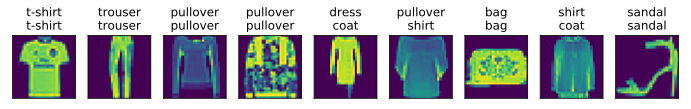

In [24]:
for X, y in test_iter:
    break

true_labels = gb.get_fashion_mnist_labels(y.asnumpy())
pred_labels = gb.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [truelabel + '\n' + predlabel for truelabel, predlabel in zip(true_labels, pred_labels)]

gb.show_fashion_mnist(X[0:9], titles[0:9])